<a href="https://colab.research.google.com/github/Bstha123/CodeAlpha_StockPrediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem: Take stock price of any company you want and predicts its price by using LSTM**

**1. Importing necessary libraries**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**2. Downloading Google data from yahoo finance**

In [91]:
start = '2014-01-01'
end = '2024-01-01'
stock = "GOOG"
data = yf.download(stock, start,end)

[*********************100%%**********************]  1 of 1 completed


**3. Exploratory Data Analysis**

In [92]:
data.reset_index(inplace = True)

In [93]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2511,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2512,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2513,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
2514,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


In [94]:
df = data['Close']
df.head()

0    27.724083
1    27.521841
2    27.828691
3    28.365179
4    28.424210
Name: Close, dtype: float64

In [95]:
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2516 entries, 0 to 2515
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2516 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [96]:
df.dtypes

dtype('float64')

In [97]:
df.dropna(inplace = True)

In [98]:
df.shape

(2516,)

<Axes: >

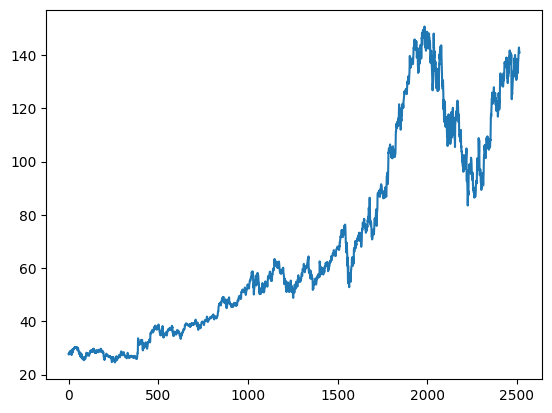

In [99]:
df.plot()

**4. Data Preprocessing and Train_Test Split**

In [100]:
train_data = pd.DataFrame(df[0: int(len(df)*0.8)])
test_data = pd.DataFrame(df[int(len(df)*0.8): len(df)])

In [101]:
train_data.shape, test_data.shape

((2012, 1), (504, 1))

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [103]:
train_data_scale = scaler.fit_transform(train_data)

In [104]:
train_data_scale

array([[0.02508157],
       [0.02347837],
       [0.02591081],
       ...,
       [0.97172788],
       [0.97903269],
       [0.96622245]])

In [105]:
x = []
y = []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100:i])
    y.append(train_data_scale[i,0])

In [106]:
x,y = np.array(x), np.array(y)

**5. LSTM Model Building**

In [107]:
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [108]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',
               return_sequences=True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu',
               return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu',
               return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

**6. Model Training upto 50 Epochs**

In [110]:

model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 328ms/step - loss: 0.0587
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - loss: 0.0081
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - loss: 0.0042
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 368ms/step - loss: 0.0042
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 336ms/step - loss: 0.0038
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - loss: 0.0039
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - loss: 0.0034
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.0042
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - loss: 0.0037
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 350ms/step - loss: 0.0032
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 366ms/step - loss: 0.0043
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 416ms/step - loss: 0.0032
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - loss: 0.0025
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - loss: 0.0024
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [111]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

**7. Evaluating in Test Data**

In [112]:
past_100_days = train_data.tail(100)

In [113]:
data_test = pd.concat([past_100_days, test_data], ignore_index=True)

In [114]:
data_test

,Close
0,137.035995
1,138.001999
2,138.096497
3,137.689499
4,138.389496
...,...
599,142.720001
600,142.820007
601,141.440002
602,141.279999


In [115]:
data_test_scale = scaler.fit_transform(data_test)

In [116]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [117]:
x, y = np.array(x), np.array(y)

In [118]:
y_pred = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


In [119]:
y_pred.shape

(504, 1)

In [120]:
scale = 1/scaler.scale_

In [121]:
y_predict = y_pred * scale

In [122]:
y = y*scale

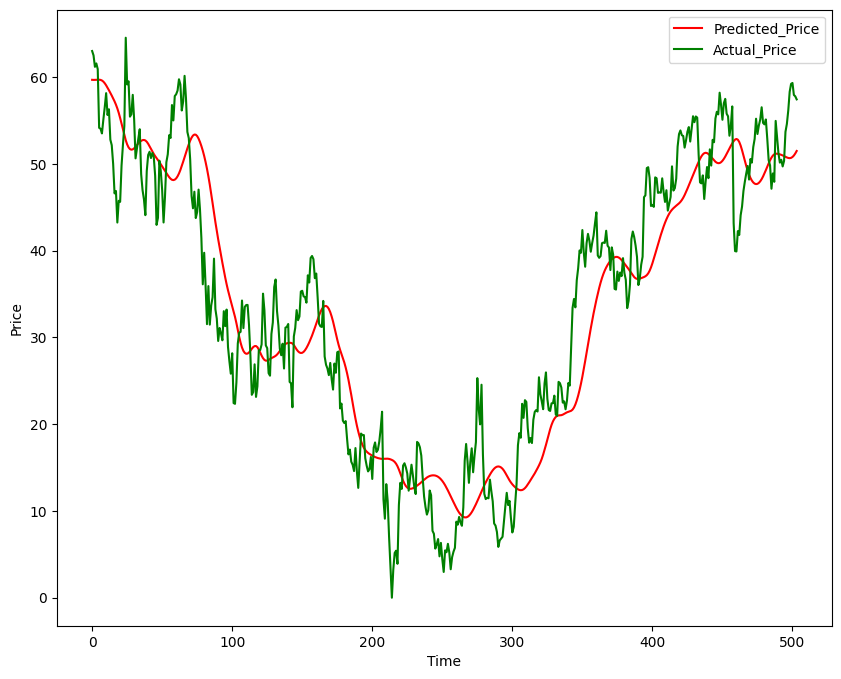

In [123]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = "Predicted_Price")
plt.plot(y, 'g', label = "Actual_Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**8. Save the model**

In [124]:
model.save("StockPrediction.keras")